<a href="https://colab.research.google.com/github/Prdazk/collabku/blob/main/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os, math, itertools, torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import DataLoader
# from torchinfo import summary
from types import SimpleNamespace
from torchvision.utils import make_grid
from sklearn.manifold import TSNE

In [7]:
try:
  import torchvision as tv
  from torchvision import transforms
except Exception as e:
    torchvision : None

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print ("menngunakan :",device)

menngunakan : cpu


In [8]:
#@title lOload Dataset
if tv is None:
  print ("instalo dulu")
else:
  transform= transforms.Compose([transforms.ToTensor()])
  train_ds=tv.datasets.MNIST(root='./data',
                            train=True,download=True,transform=transform)
  test_ds=tv.datasets.MNIST(root='./data',
                            train=False,download=True,transform=transform)
  train_dl=DataLoader(train_ds,batch_size=128,shuffle=True)
  test_dl=DataLoader(test_ds,batch_size=128,shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 40.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.06MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.93MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.40MB/s]


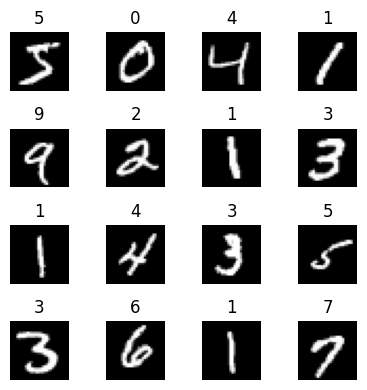

In [9]:
#tampilkan beberapa
import matplotlib.pyplot as plt

if tv is not None:
  imgs=[train_ds[i][0] for i in range(16)]
  labels=[train_ds[i][1] for i in range(16)]
  fig, axs=plt.subplots(4,4,figsize=(4,4))
  for ax,img,label in zip(axs.ravel(),imgs,labels):
    ax.imshow(img[0],cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')
  plt.tight_layout()
  plt.show()

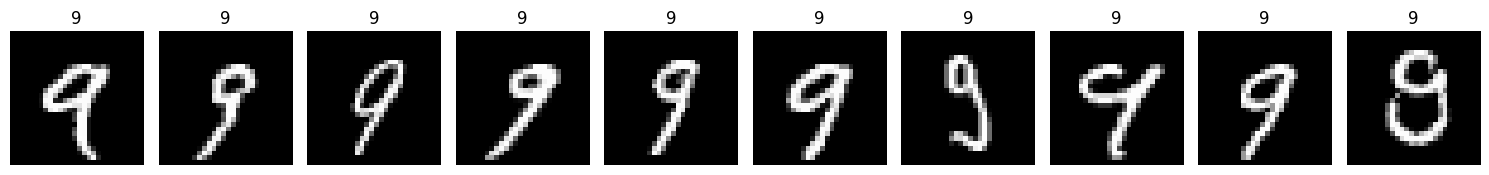

In [10]:
# ambilo 10 gambar angka 9
imgs_9 = []
for i in range(len(train_ds)):
  if train_ds[i][1] == 9:
    imgs_9.append(train_ds[i][0])
  if len(imgs_9) >= 10:
    break

#tampilkan
fig, axs = plt.subplots(1, 10, figsize=(15, 5))
for ax, img in zip(axs.ravel(), imgs_9):
  ax.imshow(img[0], cmap='gray')
  ax.axis('off')
  ax.set_title("9")
plt.tight_layout()
plt.show()

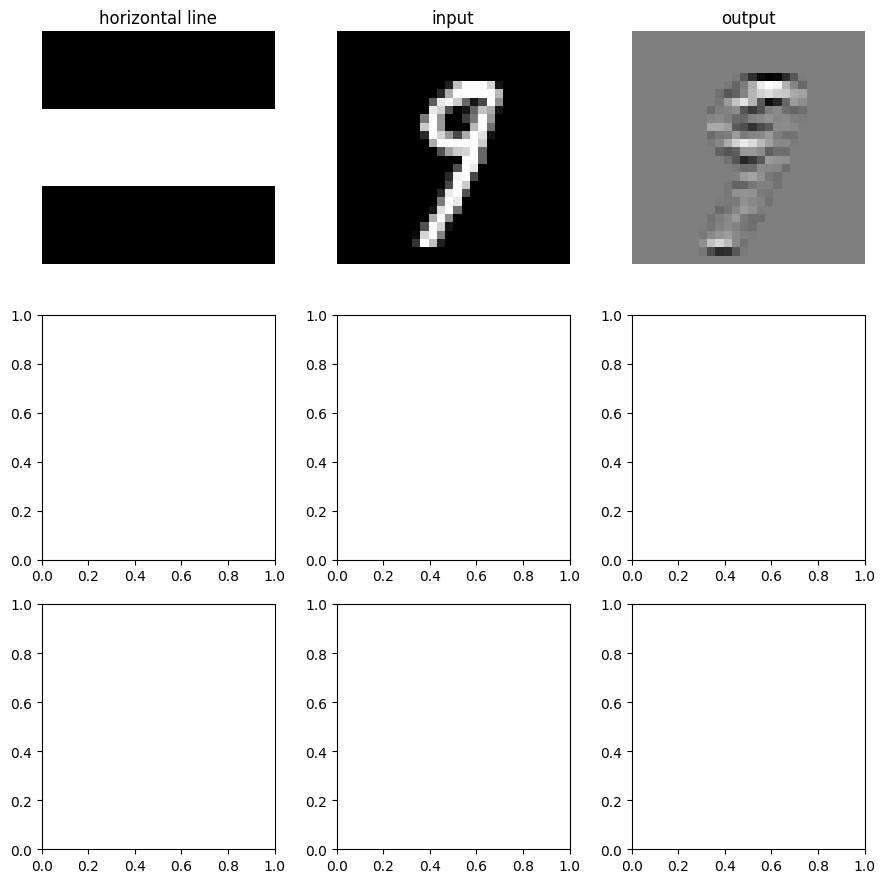

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
# kernelo untuk konvolusi
x = imgs_9[4].unsqueeze(0)

kernels ={
    'horizontal line': torch.tensor([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]],
    dtype=torch.float32).unsqueeze(0).unsqueeze(0),
    'vertical line': torch.tensor([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]],
    dtype=torch.float32).unsqueeze(0).unsqueeze(0),
    'diagonal line': torch.tensor([[-2, -1, 1], [-1, 2, -1], [1, -1, 2]],
    dtype=torch.float32).unsqueeze(0).unsqueeze(0),
}

# terapkan convolution dan tampilkan
fig, axs = plt.subplots(len(kernels), 3, figsize=(9,len(kernels)*3))
for i, (name, kernel) in enumerate(kernels.items()):
  #tampilkan kernel
  axs[i, 0].imshow(kernel[0, 0].numpy(), cmap='gray')
  axs[i, 0].axis('off')
  axs[i, 0].set_title(name)

  #tampilkan gambar input
  axs[i, 1].imshow(x.squeeze(0).squeeze(0), cmap='gray') # Corrected: squeeze twice to remove channel dim
  axs[i, 1].axis('off')
  axs[i, 1].set_title('input')

  #tampilkan hasilo convoulution
  img = F.conv2d(x, kernel, padding=1)
  axs[i, 2].imshow(img.squeeze(0).squeeze(0).detach().numpy(), cmap='gray') # Corrected: squeeze twice to remove channel dim
  axs[i, 2].axis('off')
  axs[i, 2].set_title('output')

  plt.tight_layout()
  plt.show()